# Harmonic Oscillator Lab

This notebook demonstrates some of the analysis tools you will need to complete this lab.

In [17]:
import os
import codecs

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [7]:
%matplotlib inline

### Dump the contents of one file to see what it looks like.

There's a 7-row header that we don't care about and we see that the measurements we care about -- time and position -- are in columns 0 and 1.

In [14]:
!head undamped1.txt

### Read the data and subtract off the mean position so the displacement is relative to zero.

In [20]:
filecp = codecs.open('undamped1.txt', encoding='cp1252')
t1, y1 = np.loadtxt(filecp, unpack=True, skiprows=7, usecols=[0, 1])

In [21]:
filecp = codecs.open('undamped2.txt', encoding='cp1252')
t2, y2 = np.loadtxt(filecp, unpack=True, skiprows=7, usecols=[0, 1])

In [25]:
print(t1 - t2)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


In [22]:
time = t1

In [23]:
y1 = y1 - np.mean(y1)
y2 = y2 - np.mean(y2)

### Make a quick plot.

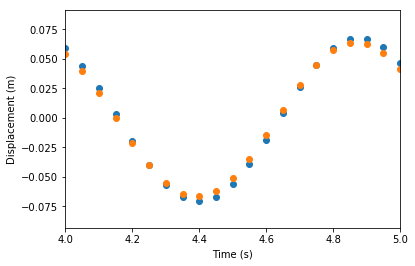

In [29]:
fig, ax = plt.subplots()
ax.scatter(time, y1)
ax.scatter(time, y2)
ax.set_xlim(4, 5)
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')

In [25]:
yavg = np.zeros_like(y1)
yerr = np.zeros_like(y1)
for ii in range(len(y1)):
    yavg[ii] = np.mean([y1[ii], y2[ii]])
    yerr[ii] = np.std([y1[ii], y2[ii]]) # / np.sqrt(2)

(5, 7)

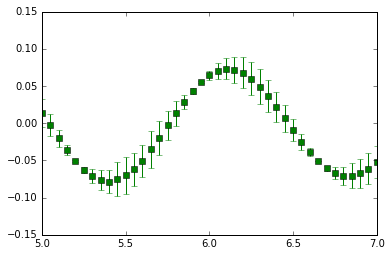

In [26]:
plt.errorbar(time, yavg, 4*yerr, color='g', fmt='s')
plt.xlim(5, 7)

In [27]:
def shm(time, A, omega, gamma):
    ymodel = A * np.cos(omega * time - gamma)
    return ymodel

In [30]:
param, _ = curve_fit(shm, time, yavg, sigma=yerr, p0=[0.1, 2*np.pi/1.0, 0.5])
ymodel = shm(time, param[0], param[1], param[2])
print(param)

[ 0.06676995  6.37126339  2.624137  ]


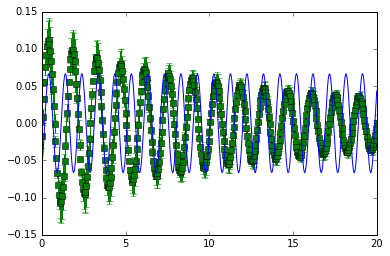

In [31]:
plt.errorbar(time, yavg, 4*yerr, color='g', fmt='s')
plt.plot(time, ymodel)